In [1]:
import pickle

In [8]:
with open('pt_metrics_101.pickle', 'rb') as fp:
    pt_metrics = pickle.load(fp)

In [9]:
pt_metrics['EfficientNetV2'] = pt_metrics.pop('EfficientNet')
pt_metrics['ResNet50'] = pt_metrics.pop('ResNet')
pt_metrics['VGG16'] = pt_metrics.pop('VGG')
pt_metrics['MobileNetV3'] = pt_metrics.pop('MobileNet')
pt_metrics['DenseNet121'] = pt_metrics.pop('DenseNet')

In [10]:
with open('npt_metrics_101.pickle', 'rb') as fp:
    npt_metrics = pickle.load(fp)

In [11]:
npt_metrics.keys()
npt_metrics['EfficientNetV2'] = npt_metrics.pop('EfficientNet')
npt_metrics['ResNet50'] = npt_metrics.pop('ResNet')
npt_metrics['VGG16'] = npt_metrics.pop('VGG')
npt_metrics['MobileNetV3'] = npt_metrics.pop('MobileNet')
npt_metrics['DenseNet121'] = npt_metrics.pop('DenseNet')

In [12]:
import matplotlib.pyplot as plt

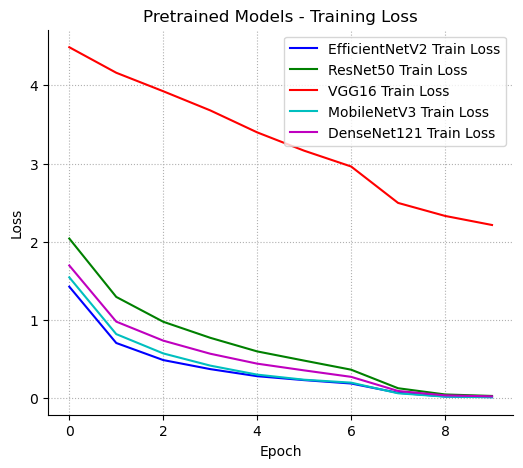

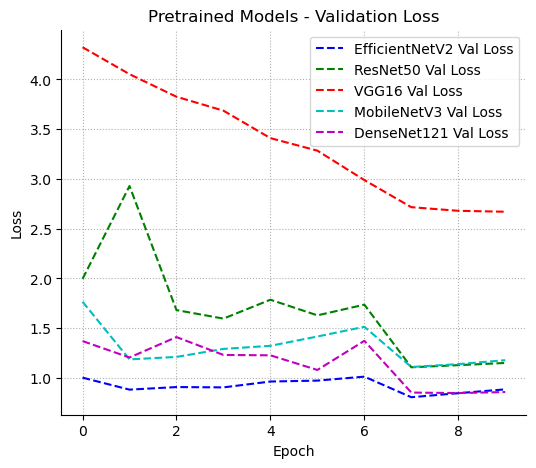

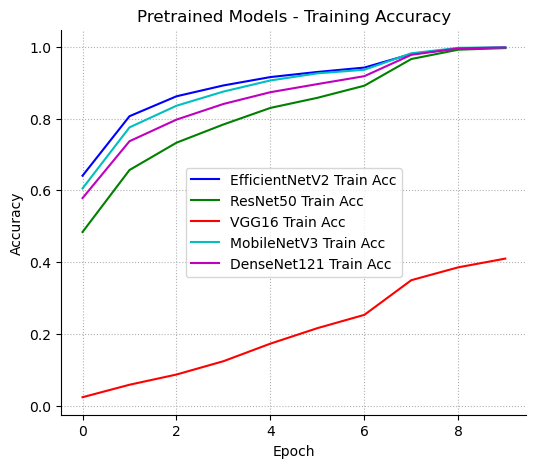

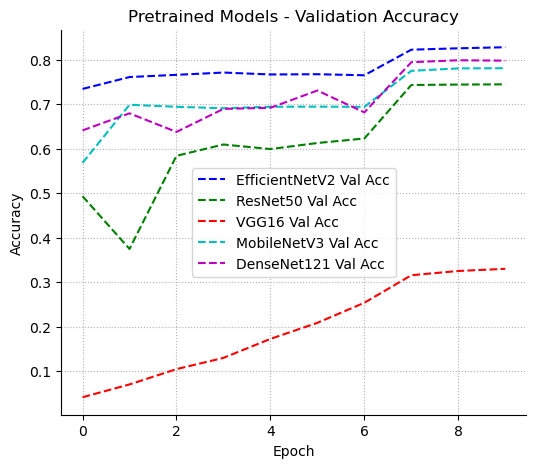

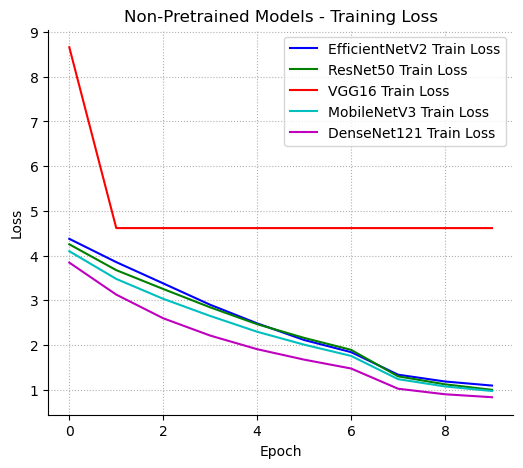

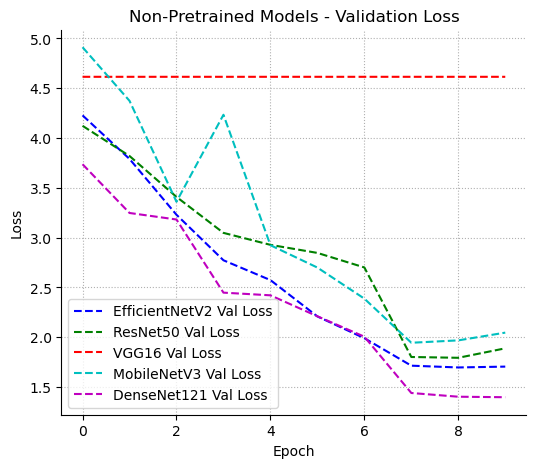

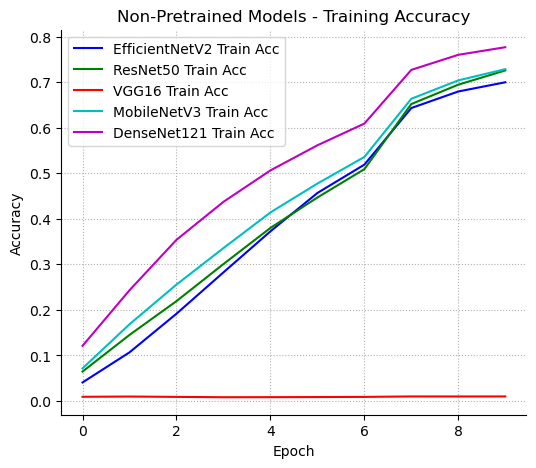

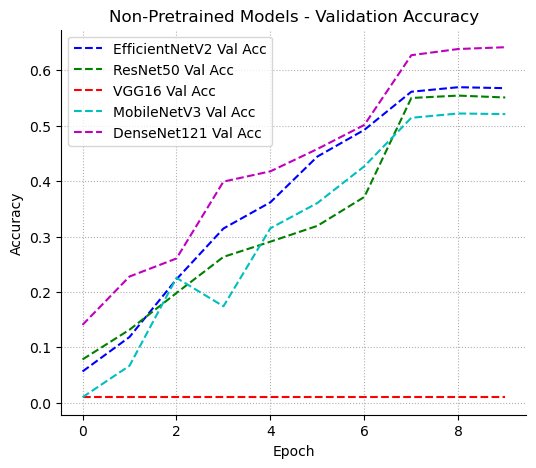

In [19]:
def plot_and_save_metrics(metrics, title, file_name):
    # Assign a unique color to each model for consistency
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    model_colors = {model_name: colors[i] for i, model_name in enumerate(metrics.keys())}

    # Plot Training Loss
    plt.figure(figsize=(6, 5))

    for model_name, model_metrics in metrics.items():
        plt.plot(model_metrics['train_losses'], label=f'{model_name} Train Loss', color=model_colors[model_name])
    plt.title(f'{title} - Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(linestyle='dotted')
    ax = plt.subplot(1,1,1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig(f'{file_name}_train_loss.jpg', dpi=300)
    plt.show()

    # Plot Validation Loss
    plt.figure(figsize=(6, 5))
    for model_name, model_metrics in metrics.items():
        plt.plot(model_metrics['val_losses'], label=f'{model_name} Val Loss', linestyle='dashed', color=model_colors[model_name])
    plt.title(f'{title} - Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(linestyle='dotted')
    ax = plt.subplot(1,1,1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig(f'{file_name}_val_loss.jpg', dpi=300)
    plt.show()

    # Plot Training Accuracy
    plt.figure(figsize=(6, 5))
    for model_name, model_metrics in metrics.items():
        plt.plot(model_metrics['train_accuracies'], label=f'{model_name} Train Acc', color=model_colors[model_name])
    plt.title(f'{title} - Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='dotted')
    ax = plt.subplot(1,1,1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig(f'{file_name}_train_acc.jpg', dpi=300)
    plt.show()

    # Plot Validation Accuracy
    plt.figure(figsize=(6, 5))
    for model_name, model_metrics in metrics.items():
        plt.plot(model_metrics['val_accuracies'], label=f'{model_name} Val Acc', linestyle='dashed', color=model_colors[model_name])
    plt.title(f'{title} - Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='dotted')
    ax = plt.subplot(1,1,1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig(f'{file_name}_val_acc.jpg', dpi=300)
    plt.show()

# Call the function for pretrained and non-pretrained models
plot_and_save_metrics(pt_metrics, 'Pretrained Models', 'pt_models')
plot_and_save_metrics(npt_metrics, 'Non-Pretrained Models', 'npt_models')

In [20]:
import os
import shutil
import numpy as np

# Define the paths and split ratios
source_dir = '../food-101/images'  # Replace with your source directory path
destination_dir = 'data'  # Replace with your destination directory path
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create train, val, and test directories in the destination folder
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(destination_dir, split)
    os.makedirs(split_dir, exist_ok=True)

# Move files into splits
for class_dir in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_dir)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        np.random.shuffle(images)

        train_split = int(train_ratio * len(images))
        val_split = int(val_ratio * len(images))

        # Creating subdirectories for each class in train, val, and test in the destination folder
        for split in ['train', 'val', 'test']:
            split_class_dir = os.path.join(destination_dir, split, class_dir)
            os.makedirs(split_class_dir, exist_ok=True)

        # Copy images to respective directories in the destination folder
        for i, image in enumerate(images):
            if i < train_split:
                split = 'train'
            elif i < train_split + val_split:
                split = 'val'
            else:
                split = 'test'

            src_path = os.path.join(class_path, image)
            dest_path = os.path.join(destination_dir, split, class_dir, image)
            shutil.copy(src_path, dest_path)

In [21]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define your transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    # Add other transformations as needed
])

# Create datasets
train_dataset = datasets.ImageFolder(root=os.path.join(destination_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(root=os.path.join(destination_dir, 'val'), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(destination_dir, 'test'), transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

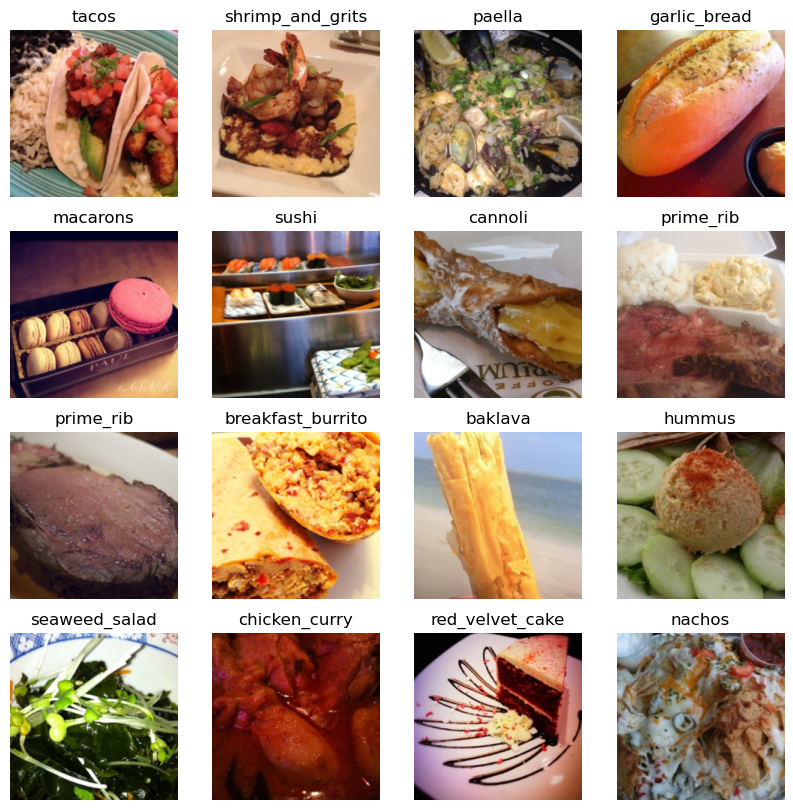

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Function to display images
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

class_names = [line.strip() for line in open('../food-101/meta/classes.txt', 'r')]

# Number of images to display
num_images = 16

# Create a grid plot
fig = plt.figure(figsize=(10, 10))

# Get random images from the train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Select a random subset of images
indices = torch.randperm(len(images))[:num_images]

for idx, i in enumerate(indices):
    ax = fig.add_subplot(4, 4, idx + 1, xticks=[], yticks=[])
    imshow(images[i])
    ax.set_title(class_names[labels[i]])

plt.show()


In [33]:
# 2x2

In [40]:
import matplotlib.pyplot as plt

def plot_and_save_metrics_grid(metrics, title, file_name):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    model_colors = {model_name: colors[i] for i, model_name in enumerate(metrics.keys())}

    # Create a 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    # fig.suptitle(title)

    # Training Loss
    for model_name, model_metrics in metrics.items():
        axs[0, 0].plot(model_metrics['train_losses'], label=f'{model_name} Train Loss', color=model_colors[model_name])
    axs[0, 0].set_title('Training Loss')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()
    axs[0, 0].grid(linestyle='dotted')

    # Validation Loss
    for model_name, model_metrics in metrics.items():
        axs[0, 1].plot(model_metrics['val_losses'], label=f'{model_name} Val Loss', linestyle='dashed', color=model_colors[model_name])
    axs[0, 1].set_title('Validation Loss')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].legend()
    axs[0, 1].grid(linestyle='dotted')

    # Training Accuracy
    for model_name, model_metrics in metrics.items():
        axs[1, 0].plot(model_metrics['train_accuracies'], label=f'{model_name} Train Acc', color=model_colors[model_name])
    axs[1, 0].set_title('Training Accuracy')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Accuracy')
    axs[1, 0].legend()
    axs[1, 0].grid(linestyle='dotted')

    # Validation Accuracy
    for model_name, model_metrics in metrics.items():
        axs[1, 1].plot(model_metrics['val_accuracies'], label=f'{model_name} Val Acc', linestyle='dashed', color=model_colors[model_name])
    axs[1, 1].set_title('Validation Accuracy')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Accuracy')
    axs[1, 1].legend()
    axs[1, 1].grid(linestyle='dotted')

    # Adjust layout and save the entire figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'{file_name}.jpg', dpi=300)
    plt.show()


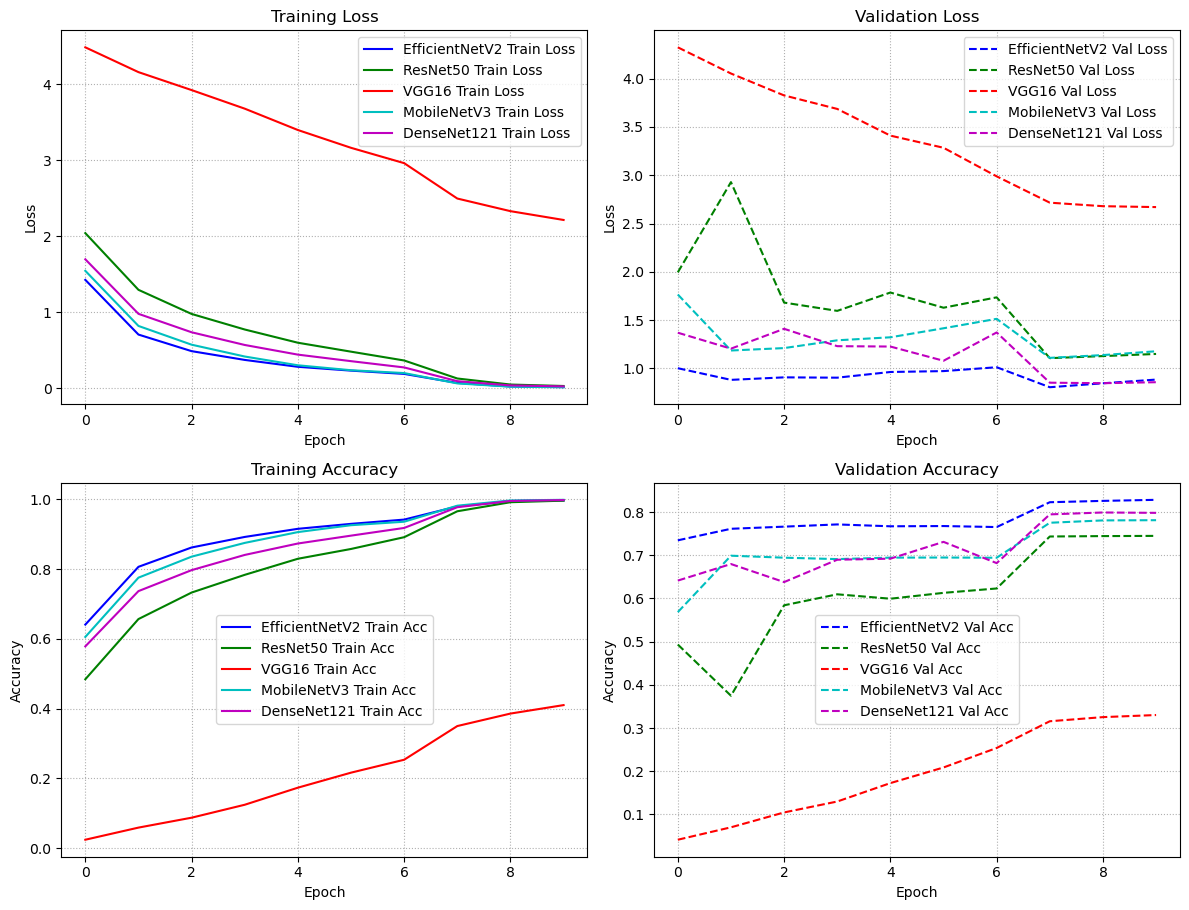

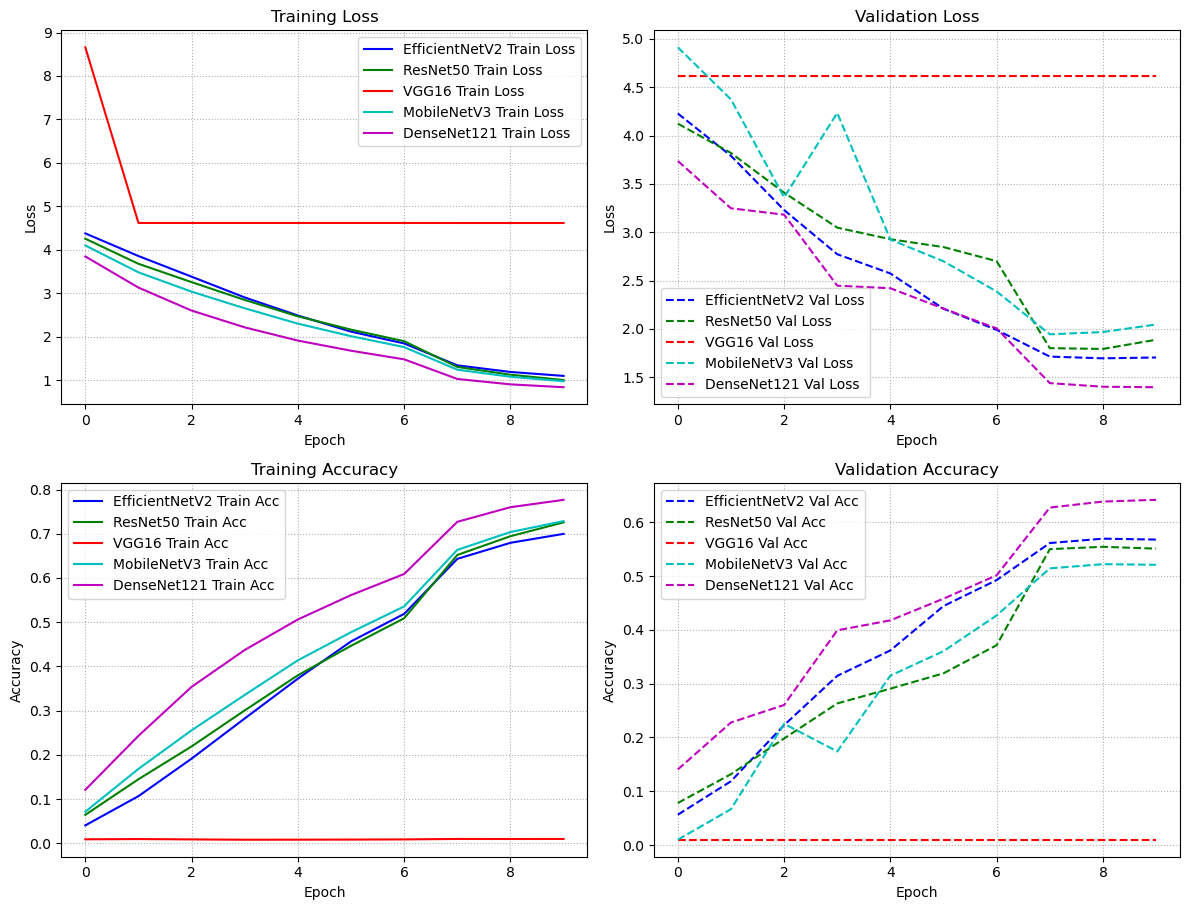

In [41]:
plot_and_save_metrics_grid(pt_metrics, 'Metrics for Pretrained Models', 'pt_models')
plot_and_save_metrics_grid(npt_metrics, 'Metrics for Non-Pretrained Models', 'npt_models')